In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
df = pd.read_csv("user_behavior_dataset.csv")

In [39]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


In [8]:
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [10]:
df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [12]:
df.columns

Index(['User ID', 'Device Model', 'Operating System',
       'App Usage Time (min/day)', 'Screen On Time (hours/day)',
       'Battery Drain (mAh/day)', 'Number of Apps Installed',
       'Data Usage (MB/day)', 'Age', 'Gender', 'User Behavior Class'],
      dtype='object')

In [14]:
df.isna().sum().sort_values(ascending = False)

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [16]:
missing_values = df.isnull().sum()
missing_values_percentage = (missing_values / len(df)) * 100
missing_values_percentage

User ID                       0.0
Device Model                  0.0
Operating System              0.0
App Usage Time (min/day)      0.0
Screen On Time (hours/day)    0.0
Battery Drain (mAh/day)       0.0
Number of Apps Installed      0.0
Data Usage (MB/day)           0.0
Age                           0.0
Gender                        0.0
User Behavior Class           0.0
dtype: float64

In [18]:
df["Operating System"] = df["Operating System"].fillna("Unknown")
mean_usage_time = df["App Usage Time (min/day)"].mean()
df["App Usage Time (min/day)"] = df["App Usage Time (min/day)"].fillna(mean_usage_time)


In [20]:
df.isna().sum().sort_values(ascending = False)

User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

In [24]:
rating_usage_corr = df[["User Behavior Class", "App Usage Time (min/day)"]].corr()
print(rating_usage_corr)



                          User Behavior Class  App Usage Time (min/day)
User Behavior Class                  1.000000                  0.970498
App Usage Time (min/day)             0.970498                  1.000000


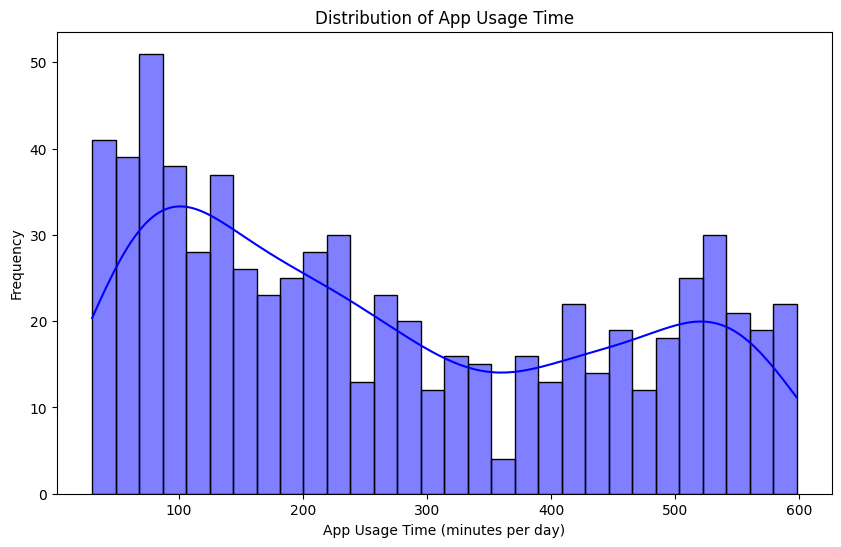

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['App Usage Time (min/day)'], bins=30, kde=True, color='blue')
plt.title('Distribution of App Usage Time')
plt.xlabel('App Usage Time (minutes per day)')
plt.ylabel('Frequency')
plt.show()


In [28]:
orders_by_device_model = df['Device Model'].value_counts().reset_index()
orders_by_device_model.columns = ['Device Model', 'Order_Count']
print(orders_by_device_model)


         Device Model  Order_Count
0        Xiaomi Mi 11          146
1           iPhone 12          146
2      Google Pixel 5          142
3           OnePlus 9          133
4  Samsung Galaxy S21          133


In [30]:
average_app_usage_time = df["App Usage Time (min/day)"].mean()
max_app_usage_time = df["App Usage Time (min/day)"].max()
min_app_usage_time = df["App Usage Time (min/day)"].min()
deviation_of_app_usage_time = df["App Usage Time (min/day)"].std()
average_app_usage_time, max_app_usage_time, min_app_usage_time, deviation_of_app_usage_time


(np.float64(271.12857142857143),
 np.int64(598),
 np.int64(30),
 np.float64(177.19948438266206))

In [32]:
average_age = df["Age"].mean()
max_age = df["Age"].max()
min_age = df["Age"].min()
average_age, max_age, min_age


(np.float64(38.48285714285714), np.int64(59), np.int64(18))

In [34]:
average_age = df["Age"].mean()
max_age = df["Age"].max()
min_age = df["Age"].min()
average_age, max_age, min_age


(np.float64(38.48285714285714), np.int64(59), np.int64(18))

In [37]:
average_battery_drain = df["Battery Drain (mAh/day)"].mean()
max_battery_drain = df["Battery Drain (mAh/day)"].max()
min_battery_drain = df["Battery Drain (mAh/day)"].min()
average_battery_drain, max_battery_drain, min_battery_drain



(np.float64(1525.1585714285713), np.int64(2993), np.int64(302))

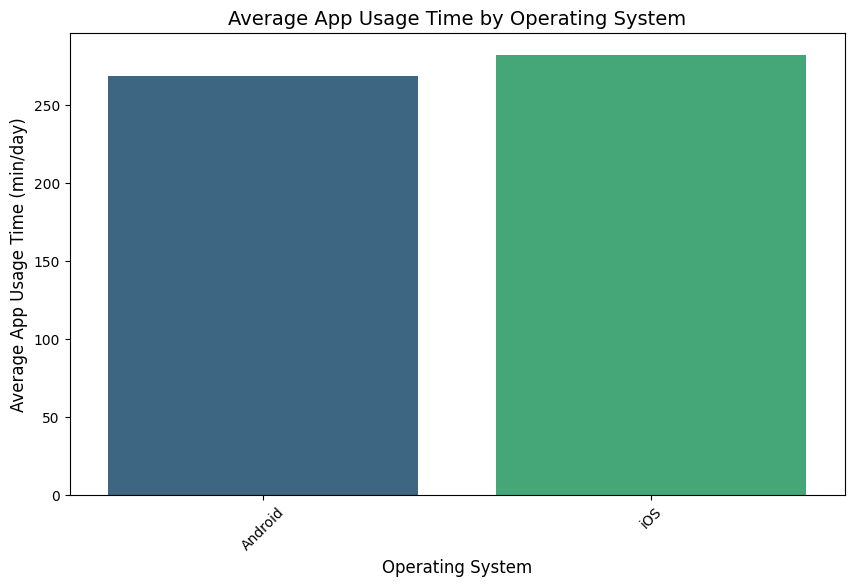

In [41]:
# Group by 'Operating System' and calculate average 'App Usage Time'
delivery_time_by_os = df.groupby('Operating System')['App Usage Time (min/day)'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Operating System', y='App Usage Time (min/day)', data=delivery_time_by_os, palette='viridis')
plt.title('Average App Usage Time by Operating System', fontsize=14)
plt.xlabel('Operating System', fontsize=12)
plt.ylabel('Average App Usage Time (min/day)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


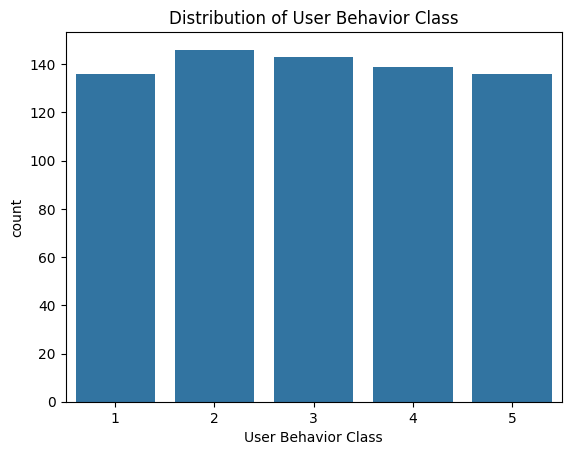

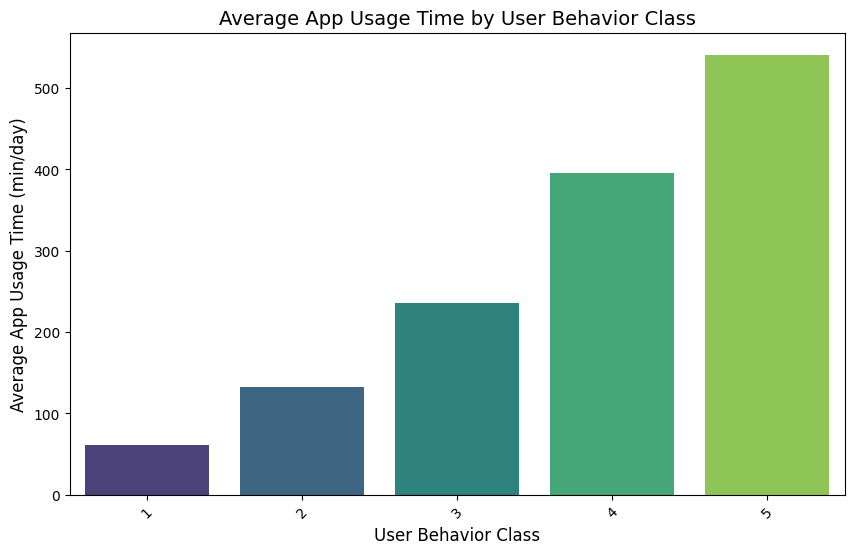

In [43]:
# Group by 'User Behavior Class' and calculate the average 'App Usage Time (min/day)'
delivery_time_by_behavior_class = df.groupby('User Behavior Class')['App Usage Time (min/day)'].mean().reset_index()
sns.countplot(x=df['User Behavior Class'])
plt.title('Distribution of User Behavior Class')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x='User Behavior Class', y='App Usage Time (min/day)', data=delivery_time_by_behavior_class, palette='viridis')
plt.title('Average App Usage Time by User Behavior Class', fontsize=14)
plt.xlabel('User Behavior Class', fontsize=12)
plt.ylabel('Average App Usage Time (min/day)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


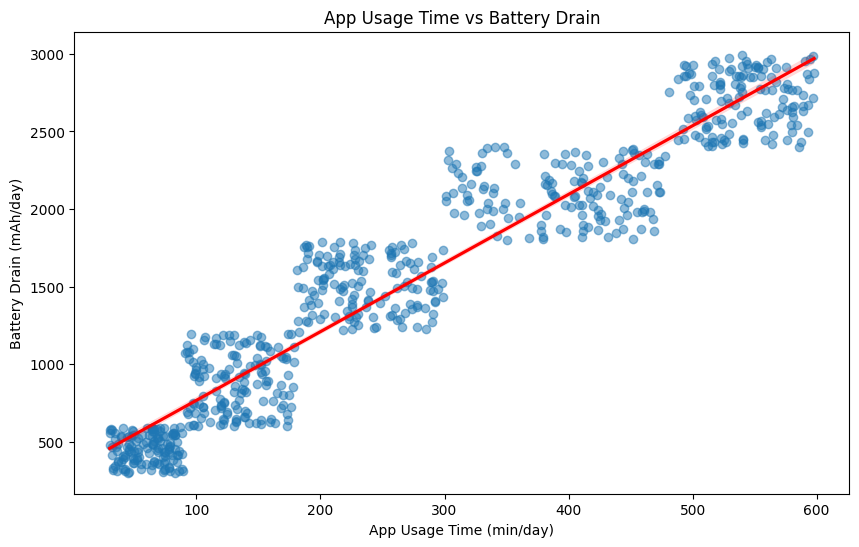

In [45]:
plt.figure(figsize=(10, 6))
sns.regplot(x='App Usage Time (min/day)', y='Battery Drain (mAh/day)', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("App Usage Time vs Battery Drain")
plt.xlabel("App Usage Time (min/day)")
plt.ylabel("Battery Drain (mAh/day)")
plt.show()


In [47]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
print(numeric_df)


     User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
0          1                       393                         6.4   
1          2                       268                         4.7   
2          3                       154                         4.0   
3          4                       239                         4.8   
4          5                       187                         4.3   
..       ...                       ...                         ...   
695      696                        92                         3.9   
696      697                       316                         6.8   
697      698                        99                         3.1   
698      699                        62                         1.7   
699      700                       212                         5.4   

     Battery Drain (mAh/day)  Number of Apps Installed  Data Usage (MB/day)  \
0                       1872                        67                 1122   
1

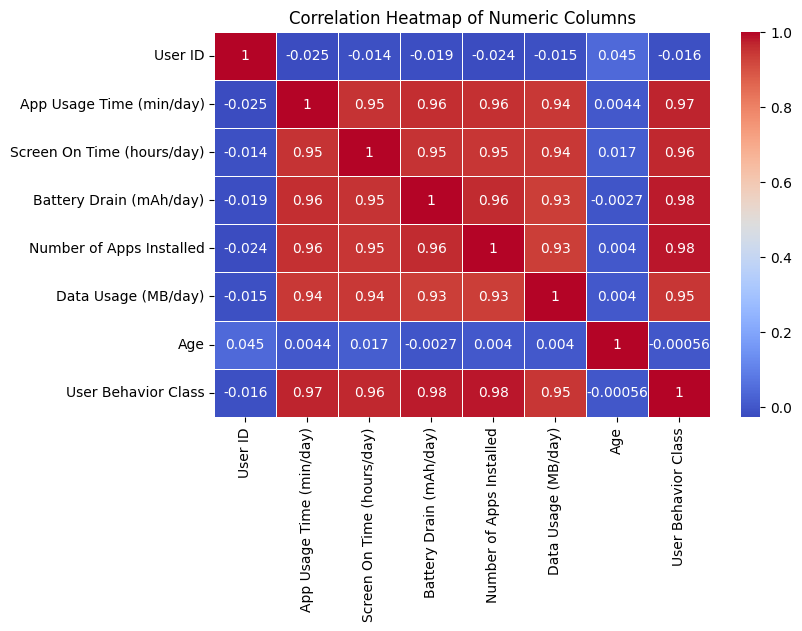

In [49]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
# Plotting the heatmap of correlations between numeric columns
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


In [51]:
avg_score_by_resources = df.groupby('Device Model')['App Usage Time (min/day)'].mean()
# Display the result
print(avg_score_by_resources)


Device Model
Google Pixel 5        267.788732
OnePlus 9             270.383459
Samsung Galaxy S21    266.421053
Xiaomi Mi 11          268.452055
iPhone 12             282.020548
Name: App Usage Time (min/day), dtype: float64


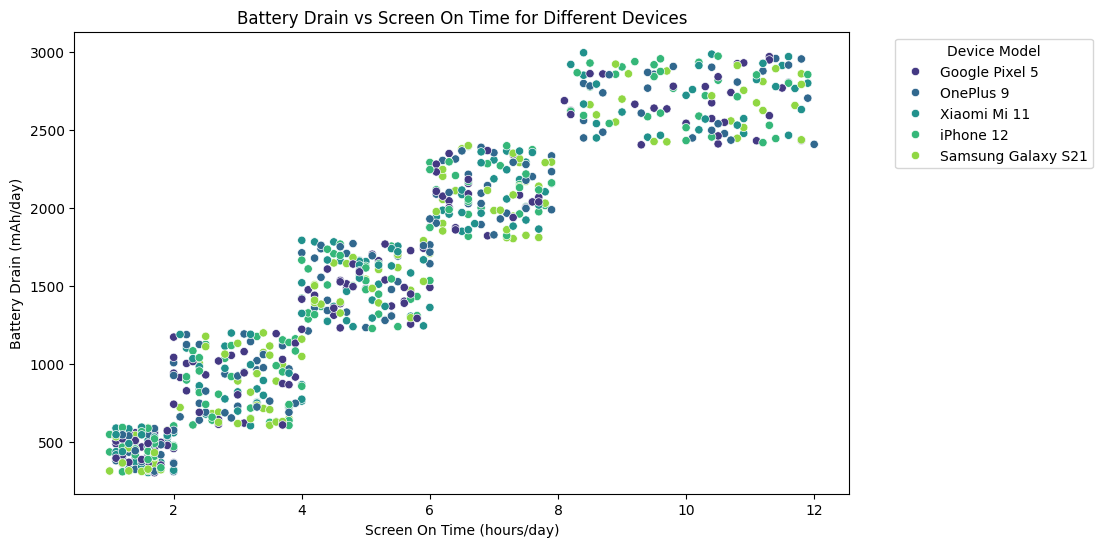

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Screen On Time (hours/day)', y='Battery Drain (mAh/day)', data=df, hue='Device Model', palette='viridis')
plt.title('Battery Drain vs Screen On Time for Different Devices')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('Battery Drain (mAh/day)')
plt.legend(title='Device Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [55]:
data_usage_by_behavior = df.groupby('User Behavior Class')['Data Usage (MB/day)'].mean()
print(data_usage_by_behavior)


User Behavior Class
1     202.323529
2     451.417808
3     822.013986
4    1232.230216
5    1974.772059
Name: Data Usage (MB/day), dtype: float64


In [56]:

battery_screen_time_by_device = df.groupby('Device Model')[['Battery Drain (mAh/day)', 'Screen On Time (hours/day)']].mean()
print(battery_screen_time_by_device)

                    Battery Drain (mAh/day)  Screen On Time (hours/day)
Device Model                                                           
Google Pixel 5                  1475.676056                    5.076056
OnePlus 9                       1523.849624                    5.241353
Samsung Galaxy S21              1504.571429                    5.318045
Xiaomi Mi 11                    1528.876712                    5.293151
iPhone 12                       1589.513699                    5.430822
